In [138]:
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [139]:
#!pip install umap-learn

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
df_train = pd.read_csv("drive/MyDrive/MobilePrice/train.csv")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [143]:
df = pd.read_csv("drive/MyDrive/winequality-red.csv")
df["y"] = df["quality"] - 3
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [144]:
np.unique(df["y"])

array([0, 1, 2, 3, 4, 5])

5 классов вин, различающихся по своим качествам.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  y                     1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [146]:
sc = StandardScaler()
data_std = sc.fit_transform(df.values[:, :-2])

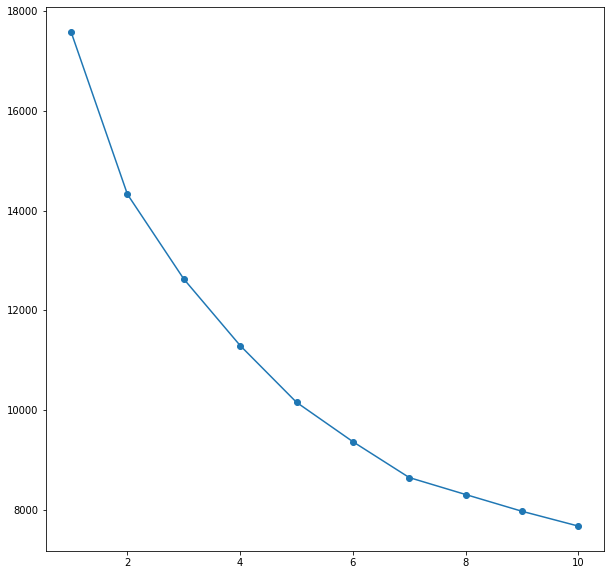

In [147]:
distortions = []

for i in range(1, 11):
  km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)

  km.fit(data_std)

  distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.show()

Методом локтя определяем кол-во кластеров равным 7, в действительности их 6.

**Разбиваем данные на обучающую и тестовую выборки:**

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data_std, df.values[:, -1], test_size=0.4, random_state=0)

**𝑘 ближайших соседей.**

In [149]:
neigh = KNeighborsClassifier(n_neighbors=6)

y_pred = neigh.fit(X_train, y_train).predict(X_test)

print('Доля правильных ответов: ', accuracy_score(y_test, y_pred))

Доля правильных ответов:  0.540625


**Наивный байесовский классификатор.**

In [150]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('Доля правильных ответов: ', accuracy_score(y_test, y_pred))

Доля правильных ответов:  0.54375


Выводы: метод 𝑘 ближайших соседей и наивный байесовский классификатор показали одинаковые результаты - 0.54.
Для 6-ти классов - это не плохой результат.

**Визуализация данных**

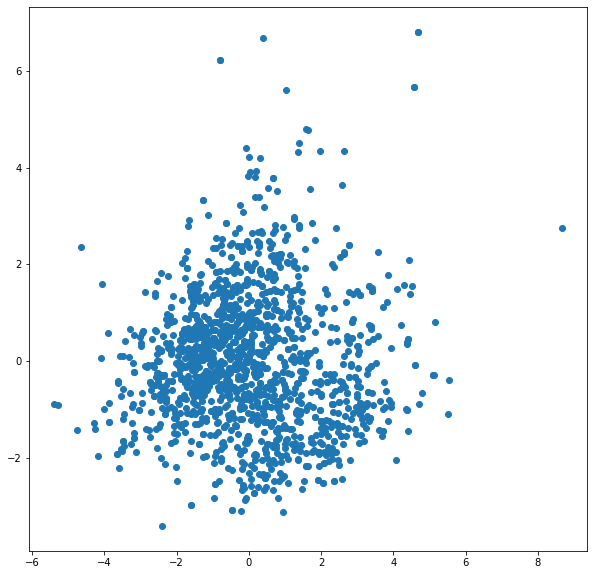

In [151]:
pca = PCA(n_components=2)

data_pca = pca.fit_transform(data_std)

plt.scatter(data_pca[:, 0], data_pca[:, 1])

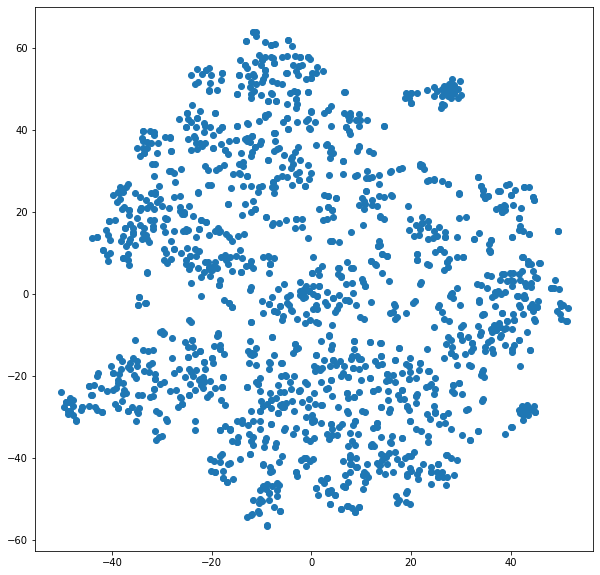

In [152]:
data_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data_std)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

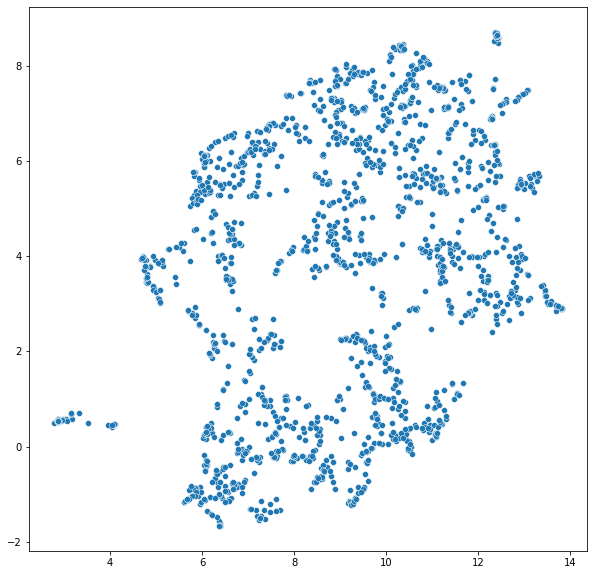

In [153]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data_std)

sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    #hue=y_sample.astype(int), 
    palette="CMRmap", 
    legend='full'
)